# Chromakey Lab
This lab focuses on some more image manipulation tasks. More specifically, you are going to play with the image pixels.

### Step 1: Click your photo
1. Go to the green screen in pairs and use your cell phones to take pictures of yourself in front of the green screen.
2. Email the clicked photo to yourself.
3. Download it to your computer.
4. Go to Downloads and rename your file to ***myimage***.

### Step 2: Download image
1. Download any image you like from https://www.pexels.com/search/background/
2. Go to Downloads and rename the file to ***background***.

### Step 3: Upload both the images
1. There's a little pop-up bar on the left side of the colab notebook, click it.
2. Click on 'Files' --> 'Upload'
3. Upload files **myimage** and **background** file from Downloads. (See the reminder pop up? Click ok)
4. Check with the person next to you to make sure you've both done it right.




**Run the code below to import the required libraries.**

In [6]:
!pip install Pillow #Installs the Pillow library
from PIL import Image #Lets us access functions related to Images. PIL is short for Pillow.

import numpy

from IPython.display import display #Lets us display images within colab notebooks

### Step 4: Resize the file
For this lab, we need to make both **myimage** and **background** file has to be of same size. 
1. The resize function requires two values, width and height.
2. We need to make sure that the width and height of both the images are the same.

If you want to crop one or more of the images, you'll need to complete the code to do that.

In [7]:
# This code will resize the 'myimage.jpg' file to the desired width and height.
myimage = Image.open("myimage.jpg")
mywidth, myheight = myimage.size
print("Width of original myimage: ", mywidth)
print("Height of original myimage: ", myheight)

Width of original myimage:  1280
Height of original myimage:  720


In [8]:
background = Image.open("background.jpg")
bwidth, bheight = background.size
print("Width of original background image: ", bwidth)
print("Height of original background image: ", bheight)

Width of original background image:  1920
Height of original background image:  1080


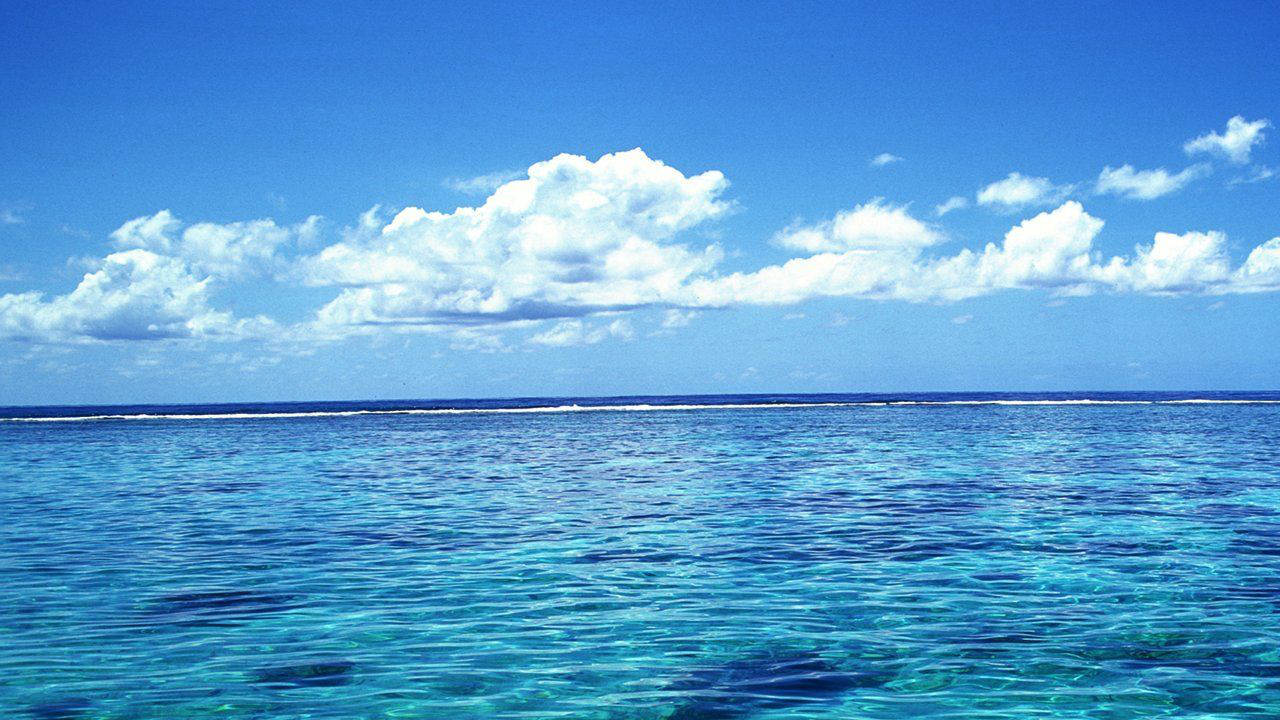

In [9]:
# if you want to crop one of your images before you resize
left = 0 
top = 0
right = 1280
bottom = 720
cropBox = (left, top, right, bottom)
# replace img with name of the appropriate image
cropped_img = background.crop(cropBox)

display(cropped_img)
# you'll need to assign the original image to be the cropped image. 

Run the code to resize and display **myimage** and **background**

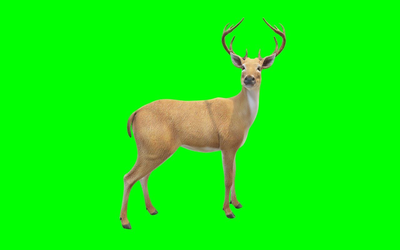

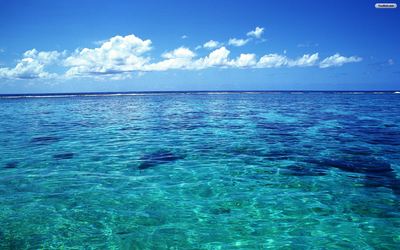

In [10]:
# pick width and height that works for your images
width = 400
height = 250
resized_myimage = myimage.resize((width, height), Image.ANTIALIAS)
display(resized_myimage)
resized_background = background.resize((width, height), Image.ANTIALIAS)
display(resized_background)

If you're unhappy with the current image orientation, you can rotate the image using the code given below. Please note that calling .transpose(Image.ROTATE_90) will rotate the image *only once*. If you wish to rotate it again just run the block one more time.

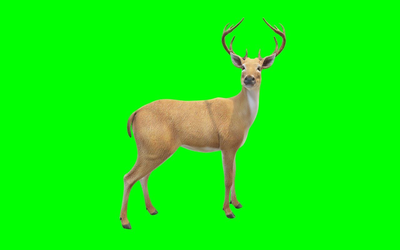

In [14]:
resized_myimage = resized_myimage.transpose(Image.ROTATE_90)
display(resized_myimage)

Run the code below to convert image to a matrix.

In [15]:
import numpy
myimage_arr = numpy.array(resized_myimage)
background_arr = numpy.array(resized_background)
print ('Images are stored as matrix myimage_arr and background_arr')

Images are stored as matrix myimage_arr and background_arr


## Your task: Print the RGB color of pixels you think are green


Let's make sure we all understand the coordinate system used by image pixels. The top left corner of the image is pixel (0,0), while the bottom right corner of the image corresponds to (400, 400). Pixels increase from left to right and from top to bottom. We'll link an image from Adafruit below to serve as a reference:

![Pixel coordinate diagram](https://cdn-learn.adafruit.com/assets/assets/000/001/264/original/lcds___displays_coordsys.png?1396770439)

In order to use the green screen, we need to know just how "green" our green screens' green pixels are.

To do that, we'll select some representative pixels from our image and check how "green" they are. We can do this by making a list of (x,y) pairs which you think correspond to the green screen part of the image. 

For example, pixel (10, 10) will usually represesnt a green screen area. This may vary based on your image.

In the code below, you need to add the pixels as tuples into the samples list as follows: 
```
samples = [(x,y), (a,b), (c, d), (e, f), (g, h)]
```

Note that the letters here are placeholders - in your code, each letter needs to be a number representing the pixel's location.




In [16]:
# add at least 5 coordinates of pixels (in the below list) that you think are green in your image 
samples = []
# An example samples array with pixels is shown below, fill in the array above according to your image
# samples = [(1270, 700), (50,100), (10, 10), (300, 40), (350, 200) ]
for i, j in samples:
  print (list(myimage_arr[j, i, :]))
  
# try to choose samples such that outputs have middle number greater than 200 and other numbers less than 100. i.e. [60, 223, 50]

## Your Task:

Now we're at the fun part - chromakeying! By the end of this part, most of the green pixels from the green screen should now be your background image you downloaded.

1. The 'if statement' we wrote isn't good at detecting green pixels. Modify the condition by changing the threshold to detect green pixels in myimage. 
2. The code below changes the red channel's colour. Your task is to try adding lines to change the blue and green channel too!

#### Variables Information:
- **copy** is a copy of myimage. Write the lines to convert green pixels in *copy* to the corresponding pixels in background image.
- The matrix form of images are stored in **background_arr** and **myimage_arr** variable. You will be using these to manipulate *copy*.
- **red**, **green** and **blue** are variables to access the red, green, and blue channels of each image's pixels. This is the same way we accessed channels in the last lab!

Play around with the code below and see how it changes your image.

Run the code to assign values to red, green and blue as an index.

In [18]:
red, green, blue = 0, 1, 2

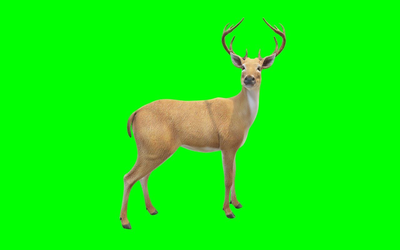

In [36]:
copy = numpy.copy(myimage_arr) #Make a copy, so we aren't changing the original image
for j in range(width):       
  for i in range(height):
    # Your task: Modify the threshold in if condition to extract all the green pixels.
    # NOTE: Your task is only to modify 1 code line below and change the numbers (threshold) for each 
    # channel until you are satisfied with the result
    if myimage_arr[0,0,0] > 30 and myimage_arr[221,184,132] < 120 and myimage_arr[0,0,0] > 160:
      copy[i, j] = [221,184,132] # initially make the pixel black (0, 0, 0)
      #copy[i, j, red] = background_arr[i, j, red]
      # Your task: write the lines for green and blue pixel values from background_arr
      
newimg = Image.fromarray(copy)
display(newimg)

### If you do not see your modified image revisit your code and correct the mistakes.

1. Right click on your new image with background and download it to your desktop.

